# NFIDSA HALIMA M1 IA RNAA PROJECT ABOUT PREDICTION BITCOIN PRICES USING LINEAR REGRESSION

In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [112]:
data= pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,4857377.0,1.471301e+09,8.428019e+07,1.325318e+09,1.398179e+09,1.471428e+09,1.544288e+09,1.617149e+09
Open,3613769.0,6.009024e+03,8.996247e+03,3.800000e+00,4.438600e+02,3.596970e+03,8.627270e+03,6.176356e+04
High,3613769.0,6.013357e+03,9.003521e+03,3.800000e+00,4.440000e+02,3.598190e+03,8.632980e+03,6.178183e+04
Low,3613769.0,6.004488e+03,8.988778e+03,1.500000e+00,4.435200e+02,3.595620e+03,8.621090e+03,6.167355e+04
Close,3613769.0,6.009014e+03,8.996360e+03,1.500000e+00,4.438600e+02,3.597000e+03,8.627160e+03,6.178180e+04
Volume_(BTC),3613769.0,9.323249e+00,3.054989e+01,0.000000e+00,4.097759e-01,1.979811e+00,7.278216e+00,5.853852e+03
Volume_(Currency),3613769.0,4.176284e+04,1.518248e+05,0.000000e+00,4.521422e+02,3.810124e+03,2.569821e+04,1.390067e+07
Weighted_Price,3613769.0,6.008935e+03,8.995992e+03,3.800000e+00,4.438306e+02,3.596804e+03,8.627637e+03,6.171621e+04


In [115]:
data.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [116]:
data = data.dropna()

In [117]:
data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [118]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:


so we have no categorial data

In [119]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [120]:
X = data.drop(columns=['Weighted_Price'])
y = data['Weighted_Price']

In [121]:
X.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

In [125]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 2.60129302e-09 -2.10022896e-02  4.66702960e-01  4.81336722e-01
  7.29427122e-02 -1.15895884e-03 -8.29622417e-08]
Intercept: -3.6888562403355536


In [126]:
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)

R-squared score: 0.9999998036344224


In [127]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.555065232383294


In [128]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 15.779600548363637


In [129]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.9723545345756386


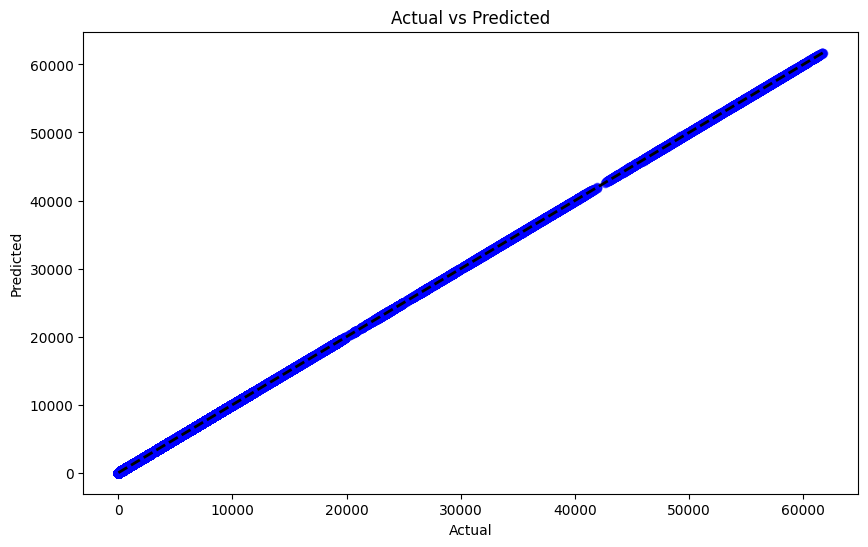

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()